In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import re

In [2]:

df_train= pd.read_csv('data/train.csv')


In [3]:
df_train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
df_train['keyword'].value_counts()

keyword
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64

### All the keys that are null are of same target 1 (Disaster)

In [5]:
df_keys_na = df_train[(df_train['keyword'].isna()) & (df_train['target']==1)]


In [6]:
df_keys_na['target'].value_counts()

target
1    42
Name: count, dtype: int64

In [7]:
df_location_na = df_train[(df_train['location'].isna()) & (df_train['target']==1)]

In [8]:
df_location_na['target'].value_counts()

target
1    1075
Name: count, dtype: int64

In [9]:
df_location_na['text'].head(19)

0     Our Deeds are the Reason of this #earthquake M...
1                Forest fire near La Ronge Sask. Canada
2     All residents asked to 'shelter in place' are ...
3     13,000 people receive #wildfires evacuation or...
4     Just got sent this photo from Ruby #Alaska as ...
5     #RockyFire Update => California Hwy. 20 closed...
6     #flood #disaster Heavy rain causes flash flood...
7     I'm on top of the hill and I can see a fire in...
8     There's an emergency evacuation happening now ...
9     I'm afraid that the tornado is coming to our a...
10          Three people died from the heat wave so far
11    Haha South Tampa is getting flooded hah- WAIT ...
12    #raining #flooding #Florida #TampaBay #Tampa 1...
13              #Flood in Bago Myanmar #We arrived Bago
14    Damage to school bus on 80 in multi car crash ...
38    Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...
85    Carolina accident: Motorcyclist Dies in I-540 ...
92    8/6/2015@2:09 PM: TRAFFIC ACCIDENT NO INJU

### Mixture of cities and countries with non alpha characters too


In [10]:
Top20 = df_train['location'].value_counts().head(20)
Top20

location
USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
California          17
Everywhere          15
New York, NY        15
California, USA     15
Florida             14
Name: count, dtype: int64

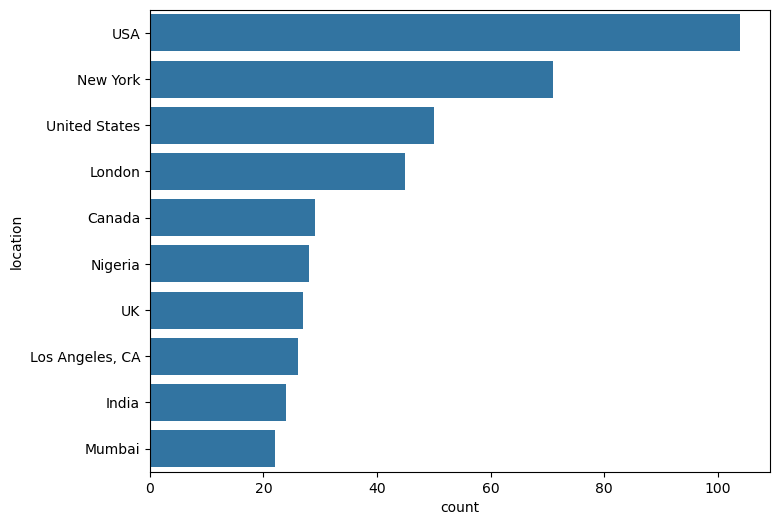

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(df_train, y='location', order=df_train['location'].value_counts().index[:10])
plt.show()

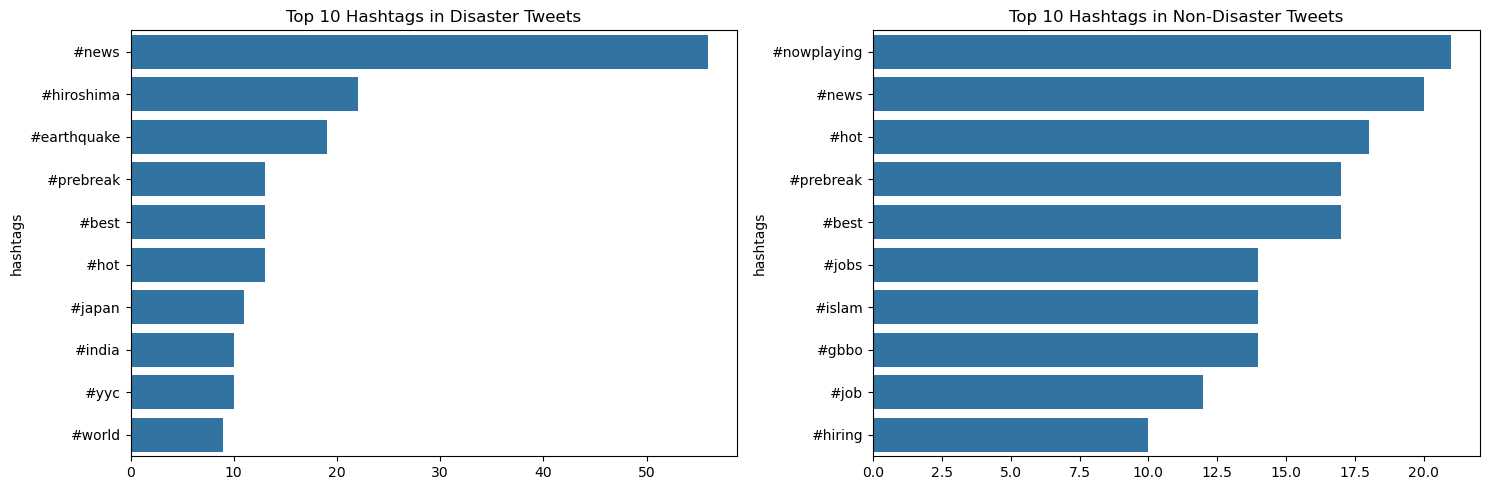

In [12]:
def extract_hashtags(text):
    return re.findall(r'#\w+', text.lower())

df_train['hashtags'] = df_train['text'].apply(extract_hashtags)
disaster_hashtags = df_train[df_train['target'] == 1]['hashtags'].explode().value_counts().head(10)
non_disaster_hashtags = df_train[df_train['target'] == 0]['hashtags'].explode().value_counts().head(10)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=disaster_hashtags.values, y=disaster_hashtags.index)
plt.title('Top 10 Hashtags in Disaster Tweets')

plt.subplot(1, 2, 2)
sns.barplot(x=non_disaster_hashtags.values, y=non_disaster_hashtags.index)
plt.title('Top 10 Hashtags in Non-Disaster Tweets')

plt.tight_layout()
plt.show()

### Need to fill all the locations as Unknown location
### Preprocess the text

In [13]:
df_train.shape

(7613, 6)

In [14]:
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)

    # Remove user mentions
    text = re.sub(r'@\w+', '', text)

    # Replace hashtags: keep the word
    text = re.sub(r'#(\w+)', r'\1', text)

    # Remove HTML entities (&amp, &gt, etc.)
    text = re.sub(r'&\w+;', ' ', text)

    # Remove punctuation except ! ? (they add emotional intensity)
    text = re.sub(r'[^\w\s!?]', ' ', text)

    # Replace multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [15]:
df_train['cleaned_text']  = df_train['text'].apply(preprocess_text)

In [16]:
df_test = pd.read_csv('data/test.csv')

In [17]:
df_test['cleaned_text']  = df_test['text'].apply(preprocess_text)

In [18]:
df_train.to_csv('data/cleaned_train.csv')
df_test.to_csv('data/cleaned_test.csv')

In [19]:
df_train['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64